#                                         Surprise Housing Pricing


---
                                         Completed By Prayag Sanjay in March 2022



## 1. Problem Statment

US based firm Surpise Housing is looking to enter Australian market. Their aim is to buy properties at low
prices and then sell them at higher prices.

They have collected an extensive data of propety prices and their features and want to find prospective properties
which then can buy cheap and then sell at maximum profits.

Hence,

### Goals of Study

**1. To find out which variables are significant in predicting properties.**

**2. How well those variables describe the price of a property ?**

**3. Use Lasso and Ridge regression to build an accurate model.**

### Business Goals

**1. To build a model to predict the price of the property based on available features.**
   
**2. To explain the dynamics of the pricing and market based on the model to identify areas which will yield maximum profit.**



## 2. Data Set

We are give a dataset on property prices across Australia and various probable factors affecting the price such as area , garage, pools, bedrooms, utilities and neighbourhood charactersitcs such as proximity to streets, market etc.


## 3. Approach

From the problem statement, we can see following characterstics

1. Business wants to know the driver variables for a specific target, in this house prices.
   So there is an expectation of **explainability** from the model.
   

2. Business want to **predict** price of house or dynamics of demand as opposed to forecast the price of houses.

Thus this problem falls in realms of **predictive analysis** where we want to interpolate the data. Aa a result of above two reasons we will employ **Linear Regression with regularisation using Lasso and Ridge Regression** machine learning methods to build the model which will answer the business questions.



## 4.  Setup and Reading the data

#### 4.1 We will import appropriate python libraries for data manipulation, visualization and Linear Regression model building, regularisation and evaluation

In [1]:
# numpy and pandas for data manipulation

import math
import numpy as np
import pandas as pd 

# Suppress warnings 

import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn with their settings for plotting

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
%matplotlib inline

# set pandas configuration to show all column data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# libaries for Linear Regression data preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# libaries for Linear Regression fitting, regularisation and evaulation

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# libaries for RFE

from sklearn.feature_selection import RFE

# libaries for finding metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 4.2 We will load the data.

In [2]:
# Now we will read the data from csv file

houses = pd.read_csv('train.csv')

## 5. Data quality and validity tests

After having read we will get to know about the data and perform validation and quality tests on it

### 5.1 First check a few rows from the dataset

In [3]:
houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### 5.2 Get the column and row counts

In [4]:
# get the shape of the dataset

houses.shape

(1460, 81)

### 5.3 Check whether rows have null values and type of columns

In [5]:
# find information about the dataset

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observation:**

There are several features which have null values, hence some sort of data imputation is required which we will do in subsequent steps.

### 5.4 Convert columns to proper types

In [6]:
# converting following variables from numerical to categorical type as data they have is of categorical type

arr = ['MSSubClass', 'OverallQual', 'OverallCond']
for col in arr:
    houses[col] = houses[col].astype('object')

### 5.5 Check for any duplicate rows in the dataset

In [7]:
# Check if there any duplicates

houses[houses.duplicated()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Observation:**

There are no duplicate rows in the dataset. So no rows needs to be removed.

### 5.6 Handle null values in numerical columns

In [8]:
# we will check if there are any numerical variables with null values
# we will find total number of null values and percentage

# collect all numeric (float and int) variables in the dataset
num_columns = houses.select_dtypes(include=['float64', 'int64']).columns

tot_rows = houses.shape[0]
for col in num_columns :
    num_nulls = houses[col].isna().sum()
    if num_nulls > 0 :
        pct = num_nulls / tot_rows * 100
        print(col + " : " + str(num_nulls) + " , " + str(round(pct)) + "%")

LotFrontage : 259 , 18%
MasVnrArea : 8 , 1%
GarageYrBlt : 81 , 6%


In [9]:
# for cases where lot fontage is null, we will see the lot types
# this is to see if we can impute missing values from LotConfig relation

print('With frontage:', houses.loc[~houses['LotFrontage'].isna(), :]['LotConfig'].unique())
print('Without frontage', houses.loc[houses['LotFrontage'].isna(), :]['LotConfig'].unique())


With frontage: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Without frontage ['Corner' 'Inside' 'CulDSac' 'FR2']


**Observation:**


There is no clear relation between lot type and whether house will have frontage our not. Hence we can not do any imputation on this basis.

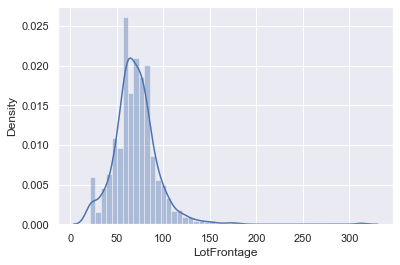

In [10]:
# to impute the missing value of LotFrontage, we will find the distribution of the LotFrantage

sns.distplot(houses['LotFrontage'])
plt.show()

**Observation:**


Since the distribution shows a heavy left skew, it better to impute missing value with median

In [11]:
# impute null values of LotFrontage with median, as median is not affected by outliers

houses.loc[houses['LotFrontage'].isna(), 'LotFrontage'] = houses['LotFrontage'].median()

In [12]:
# impute value of MasVnrArea with median, as median is not affected by outliers

houses.loc[houses['MasVnrArea'].isna(), 'MasVnrArea'] = houses['MasVnrArea'].median()

In [13]:
# for GarageYrBlt , we will check if missing values for cases where there is no garage.

houses.loc[houses['GarageYrBlt'].isna(), 'GarageType'].isna().count()

81

**Observation:**

Since number of cases where GarageYrBlt where is null is same as number where there is no garage,
we can concluded that GarageYrBlt is null for cases where there is no garage.

The percentage of such rows is 6% which is kind of significant number. 
Since we are going to derive the age of garage from this column, for the cases where it is null we set it to year of sale.
We are going to derive a column age of garage, so setting it year of sale, will make the age of garage to 0 for such cases.
The reason being from a perpective a potential buyer higher age of garage, higher is the value.

In [14]:
# impute missing value of GarageYrBlt with year of sale

houses.loc[houses['GarageYrBlt'].isna(), 'GarageYrBlt'] = houses['YrSold']

### 5.7 Handle null values in categorical columns

In [15]:
# get names all categorical columns

cat_columns = houses.select_dtypes(include=['object']).columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# we will check if there are any categorical variables with null values
# we will find total number of null values and percentage

for col in cat_columns :
    num_nulls = houses[col].isna().sum()
    if num_nulls > 0 :
        pct = num_nulls / tot_rows * 100
        print(col + " : " + str(num_nulls) + " , " + str(round(pct)) + "%")

Alley : 1369 , 94%
MasVnrType : 8 , 1%
BsmtQual : 37 , 3%
BsmtCond : 37 , 3%
BsmtExposure : 38 , 3%
BsmtFinType1 : 37 , 3%
BsmtFinType2 : 38 , 3%
Electrical : 1 , 0%
FireplaceQu : 690 , 47%
GarageType : 81 , 6%
GarageFinish : 81 , 6%
GarageQual : 81 , 6%
GarageCond : 81 , 6%
PoolQC : 1453 , 100%
Fence : 1179 , 81%
MiscFeature : 1406 , 96%


In [17]:
# check the type of values in 'Alley'

houses['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [18]:
# here 'nan' means no alley access as per data dictionary. So for better readbility we will change 'Nan' to 'NoAlley'

houses.loc[houses['Alley'].isna(), 'Alley'] = 'NoAlley'
houses['Alley'].unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

In [19]:
# check the type of values in 'MasVnrType'

houses['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [20]:
# we will check the MasVnrArea against houses which MasVnrType as null

houses.loc[houses['MasVnrType'].isna(), 'MasVnrArea'] 

234     0.0
529     0.0
650     0.0
936     0.0
973     0.0
977     0.0
1243    0.0
1278    0.0
Name: MasVnrArea, dtype: float64

In [21]:
# since value of area is 0, we can conclude that these houses do not have Masonry veneer type and hence it can be set to 'None'

houses.loc[houses['MasVnrType'].isna(), 'MasVnrType'] = 'None'
houses['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [22]:
# check the type of values in 'Electrical'

houses['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [23]:
houses['Electrical'].mode()

0    SBrkr
dtype: object

In [24]:
# here 'nan' the value is missing, since there is only one such row, we will impute with mode value

houses.loc[houses['Electrical'].isna(), 'Electrical'] = 'SBrkr'
houses['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [25]:
# check the type of values in 'FireplaceQu'

houses['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [26]:
# here 'nan' means no fireplace per data dictionary. So for better readibility we will change 'Nan' to 'NoFirePlace'

houses.loc[houses['FireplaceQu'].isna(), 'FireplaceQu'] = 'NoFirePlace'
houses['FireplaceQu'].unique()

array(['NoFirePlace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [27]:
# check the type of values in 'PoolQC'

houses['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [28]:
# here 'nan' means no pool per data dictionary. So for better readibility we will change 'Nan' to 'PoolQCNA' (not applicable)

houses.loc[houses['PoolQC'].isna(), 'PoolQC'] = 'PoolQCNA'
houses['PoolQC'].unique()

array(['PoolQCNA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [29]:
# check the type of values in 'Fence'

houses['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [30]:
# here 'nan' means no fence per data dictionary. So for better readibility we will change 'Nan' to 'NoFence'

houses.loc[houses['Fence'].isna(), 'Fence'] = 'NoFence'
houses['Fence'].unique()

array(['NoFence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [31]:
# check the type of values in 'MiscFeature'

houses['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [32]:
# here 'nan' means no miscellaneous per data dictionary. So for better readibility we will change 'Nan' to 'NoMiscFeature'

houses.loc[houses['MiscFeature'].isna(), 'MiscFeature'] = 'NoMiscFeature'
houses['MiscFeature'].unique()

array(['NoMiscFeature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

As per data dictionary following variables will have value Nan if there is no basement.
So for these variables, we will set the Nan value 'Variable Name'+'NA' (Not applicable)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 

In [33]:
# array of basement features

basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in basement_cols:
    print ('------------------------', col, '------------------------')

    
    # check current unique() values
    print(houses[col].unique())
    
    # change to nan value to show column name + 'NA'
    houses.loc[houses[col].isna(), col] = col + 'NA'
    
    # check chnaged unique() values
    print(houses[col].unique())

    print ('')

------------------------ BsmtQual ------------------------
['Gd' 'TA' 'Ex' nan 'Fa']
['Gd' 'TA' 'Ex' 'BsmtQualNA' 'Fa']

------------------------ BsmtCond ------------------------
['TA' 'Gd' nan 'Fa' 'Po']
['TA' 'Gd' 'BsmtCondNA' 'Fa' 'Po']

------------------------ BsmtExposure ------------------------
['No' 'Gd' 'Mn' 'Av' nan]
['No' 'Gd' 'Mn' 'Av' 'BsmtExposureNA']

------------------------ BsmtFinType1 ------------------------
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'BsmtFinType1NA' 'LwQ']

------------------------ BsmtFinType2 ------------------------
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Unf' 'BLQ' 'BsmtFinType2NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']



As per data dictionary following variables will have value Nan, if there is no basement.
So for these variables, we will set the Nan value 'Variable Name'+'NA' (Not applicable)

GarageType, GarageFinish , GarageQual , GarageCond

In [34]:
# array of garage features

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in garage_cols:
    print ('------------------------', col, '------------------------')

    
    # check current unique() values
    print(houses[col].unique())
    
    # change to nan value to show 'NA'
    houses.loc[houses[col].isna(), col] = col + 'NA'
    
    # check chnaged unique() values
    print(houses[col].unique())

    print ('')

------------------------ GarageType ------------------------
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'GarageTypeNA' 'Basment' '2Types']

------------------------ GarageFinish ------------------------
['RFn' 'Unf' 'Fin' nan]
['RFn' 'Unf' 'Fin' 'GarageFinishNA']

------------------------ GarageQual ------------------------
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' 'Gd' 'GarageQualNA' 'Ex' 'Po']

------------------------ GarageCond ------------------------
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'GarageCondNA' 'Gd' 'Po' 'Ex']



### 5.8 Columns in following array are categorical so getting unique values in each columns to verify if values are valid

In [35]:
# get unqiue values in each of following columns

for var in cat_columns :
    print(var)
    print(houses[var].sort_values().unique())
    print('----------------------------')

MSSubClass
[20 30 40 45 50 60 70 75 80 85 90 120 160 180 190]
----------------------------
MSZoning
['C (all)' 'FV' 'RH' 'RL' 'RM']
----------------------------
Street
['Grvl' 'Pave']
----------------------------
Alley
['Grvl' 'NoAlley' 'Pave']
----------------------------
LotShape
['IR1' 'IR2' 'IR3' 'Reg']
----------------------------
LandContour
['Bnk' 'HLS' 'Low' 'Lvl']
----------------------------
Utilities
['AllPub' 'NoSeWa']
----------------------------
LotConfig
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
----------------------------
LandSlope
['Gtl' 'Mod' 'Sev']
----------------------------
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
----------------------------
Condition1
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
----------------------------


**Observations:**

- We verified each values against the data dictionary

- All the values were as per the data dictionary and none of them are incorrect.

### 5.9 Checking columns where same value is repeated in all rows

In [36]:
# checking percentage of value distribution in each column

cols_drop = []
for col in houses.columns :
    max_pct = np.max(houses[col].value_counts(normalize=True) * 100)
    if (max_pct > 90) :
        print(col, 'Max percentage of value=', str(max_pct))
        cols_drop.append(col)

Street Max percentage of value= 99.58904109589041
Alley Max percentage of value= 93.76712328767123
Utilities Max percentage of value= 99.93150684931507
LandSlope Max percentage of value= 94.65753424657535
Condition2 Max percentage of value= 98.97260273972603
RoofMatl Max percentage of value= 98.21917808219179
Heating Max percentage of value= 97.80821917808218
CentralAir Max percentage of value= 93.4931506849315
Electrical Max percentage of value= 91.43835616438356
LowQualFinSF Max percentage of value= 98.21917808219179
BsmtHalfBath Max percentage of value= 94.3835616438356
KitchenAbvGr Max percentage of value= 95.34246575342465
Functional Max percentage of value= 93.15068493150685
GarageCond Max percentage of value= 90.82191780821918
PavedDrive Max percentage of value= 91.78082191780823
3SsnPorch Max percentage of value= 98.35616438356163
ScreenPorch Max percentage of value= 92.05479452054794
PoolArea Max percentage of value= 99.52054794520548
PoolQC Max percentage of value= 99.5205479

We will drop these columns as almost 90% have same values, hence the model will not learn anything from these columns

In [37]:
# dropping columns where more than 90% of rows have same values

houses.drop(cols_drop, axis=1, inplace=True)

### 5.10 Validating the numerical values to see whether range is ok

In [38]:
# we will check if the numerical data is with in correct range and no apperent outliers

houses.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1980.135616,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,24.921194,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


**Observation:**

Looking at the mean, min and max and co-relating with IQR, **there seem to be few outliters**.

We will check using boxplot

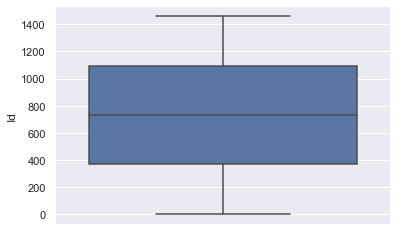

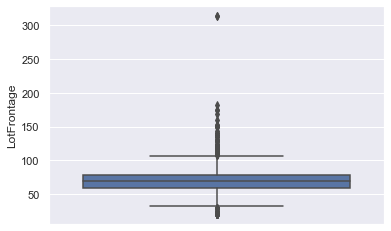

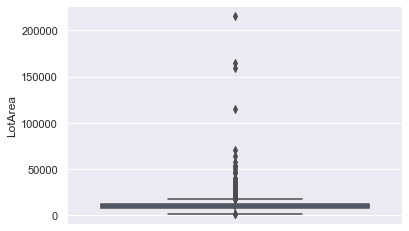

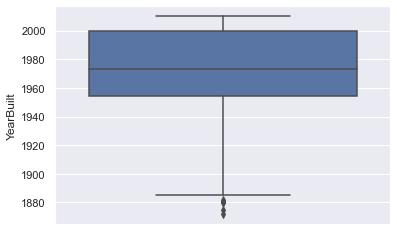

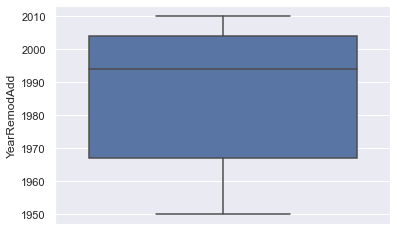

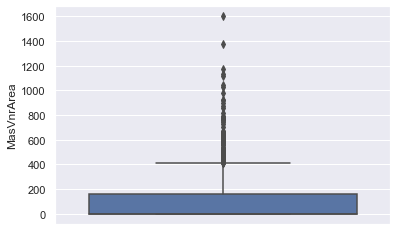

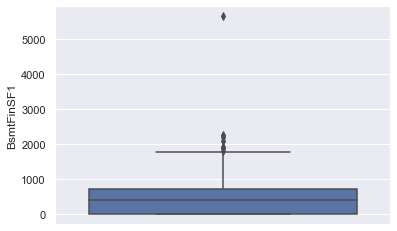

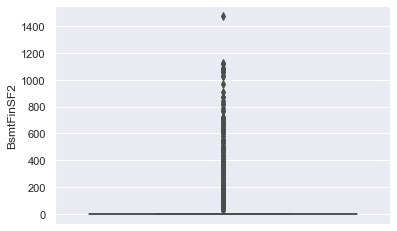

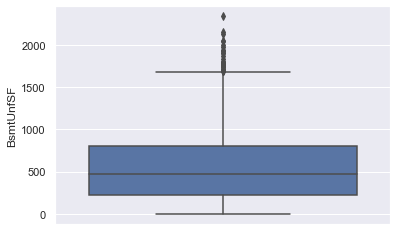

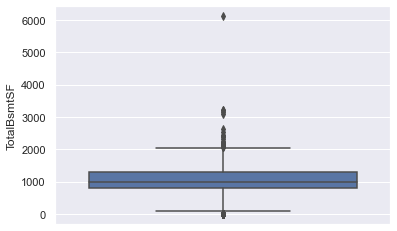

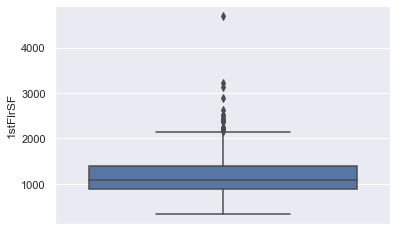

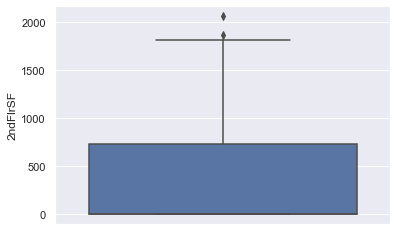

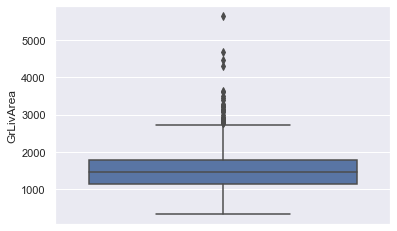

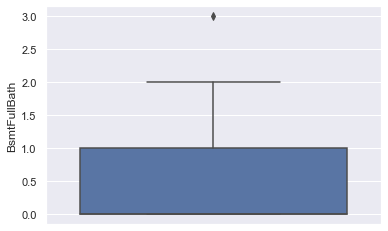

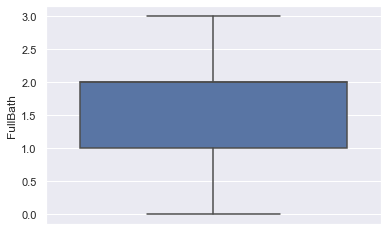

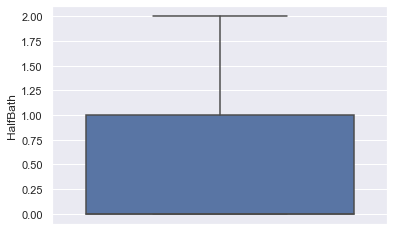

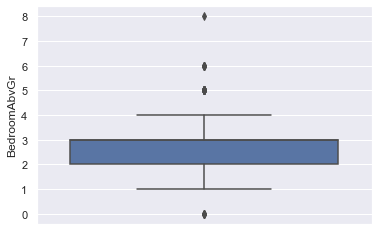

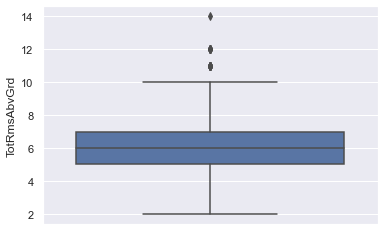

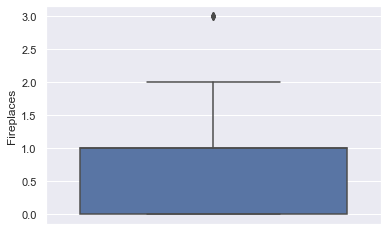

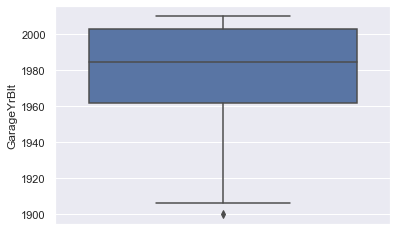

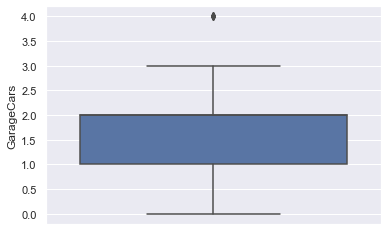

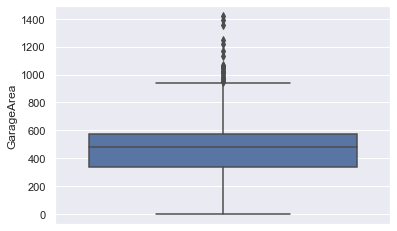

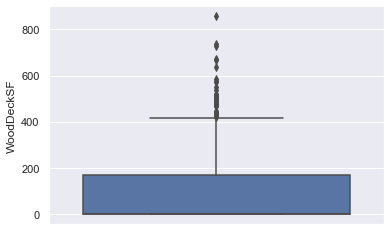

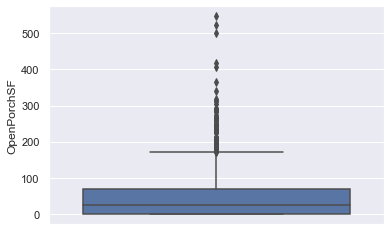

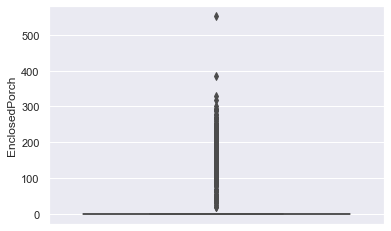

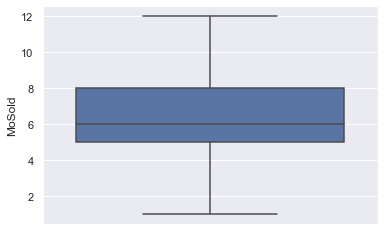

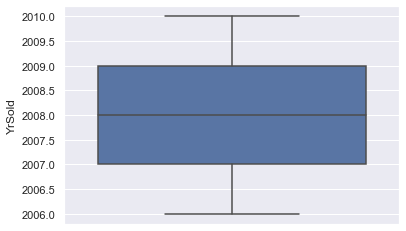

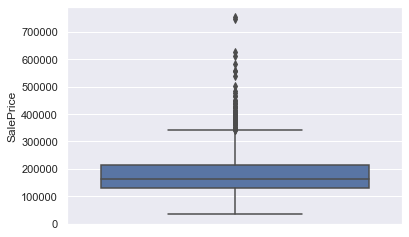

In [39]:
num_columns = houses.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    plt.figure()
    sns.boxplot(y=houses[col])
    plt.show()

In [40]:
# LotArea seem to have obvious outliers

houses.loc[houses['LotArea'] > 100000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,69.0,159000,IR2,Low,CulDSac,ClearCr,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,Gd,1444,700,2144,0,2,0,4,Gd,7,2,TA,Attchd,1958.0,Fin,2,389,TA,0,98,0,NoFence,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,IR3,Low,Inside,Timber,Norm,1Fam,1Story,7,5,1965,1965,Hip,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,TA,2036,0,2036,2,2,0,3,TA,8,2,Gd,Attchd,1965.0,RFn,2,513,TA,0,0,0,NoFence,6,2009,WD,Normal,375000
335,336,190,RL,69.0,164660,IR1,HLS,Corner,Timber,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,Ex,1619,167,1786,2,2,0,3,TA,7,2,Gd,Attchd,1965.0,Fin,2,529,TA,670,0,0,NoFence,8,2008,WD,Normal,228950
706,707,20,RL,69.0,115149,IR2,Low,CulDSac,ClearCr,Norm,1Fam,1Story,7,5,1971,2002,Gable,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,TA,1824,0,1824,1,2,0,2,Gd,5,2,TA,Attchd,1971.0,Unf,2,739,TA,380,48,0,NoFence,6,2007,WD,Normal,302000


In [41]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['LotArea'] > 100000)]

In [42]:
# LotFrontage seem to have obvious outliers

houses.loc[houses['LotFrontage'] > 300, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,IR2,HLS,Inside,NAmes,PosA,1Fam,1Story,7,7,1960,2007,Flat,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,Ex,2069,0,2069,1,2,0,4,Gd,9,1,Gd,Attchd,1960.0,RFn,2,505,TA,0,0,0,NoFence,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,1Fam,2Story,10,5,2008,2008,Hip,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,Ex,4692,950,5642,2,2,1,3,Ex,12,3,Gd,Attchd,2008.0,Fin,2,1418,TA,214,292,0,NoFence,1,2008,New,Partial,160000


In [43]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['LotFrontage'] > 100000)]

In [44]:
# YearBuilt seem to have obvious outliers

houses.loc[houses['YearBuilt'] < 1900, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
106,107,30,RM,60.0,10800,Reg,Lvl,Inside,OldTown,Norm,1Fam,1Story,4,7,1885,1995,Mansard,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,641,641,Gd,1047,0,1047,0,1,0,2,TA,6,0,NoFirePlace,Detchd,1954.0,Unf,1,273,Fa,0,0,0,NoFence,8,2007,WD,Normal,100000
185,186,75,RM,90.0,22950,IR2,Lvl,Inside,OldTown,Artery,1Fam,2.5Fin,10,9,1892,1993,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,Ex,1518,1518,3608,0,2,1,4,Ex,12,2,TA,Detchd,1993.0,Unf,3,840,Ex,0,260,0,GdPrv,6,2006,WD,Normal,475000
304,305,75,RM,87.0,18386,Reg,Lvl,Inside,OldTown,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1470,1470,Ex,1675,1818,3493,0,3,0,3,Gd,10,1,Ex,Attchd,2003.0,Unf,3,870,TA,302,0,0,NoFence,5,2008,WD,Normal,295000
583,584,75,RM,75.0,13500,Reg,Lvl,Inside,OldTown,Artery,1Fam,2.5Unf,10,9,1893,2000,Gable,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,Gd,1521,1254,2775,0,3,1,3,Gd,9,1,Gd,Detchd,1988.0,Unf,2,880,Gd,105,502,0,NoFence,7,2008,WD,Normal,325000
630,631,70,RM,50.0,9000,Reg,Lvl,Corner,OldTown,Artery,1Fam,2Story,5,6,1880,1991,Gable,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,Fa,Fa,No,Unf,0,Unf,0,636,636,TA,1089,661,1750,0,1,0,3,Ex,8,0,NoFirePlace,Detchd,1937.0,Unf,1,240,Fa,0,0,293,MnPrv,6,2006,WD,Abnorml,124000
716,717,70,RM,60.0,10800,Reg,Bnk,Inside,OldTown,Norm,1Fam,2Story,7,8,1890,1998,Gable,Wd Sdng,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,718,718,Ex,1576,978,2554,0,1,1,3,TA,8,0,NoFirePlace,Detchd,1996.0,Unf,2,704,TA,0,48,143,NoFence,7,2007,WD,Normal,159500
747,748,70,RM,65.0,11700,IR1,Lvl,Corner,OldTown,Norm,1Fam,2Story,7,7,1880,2003,Mansard,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,TA,1320,1320,2640,0,1,1,4,Gd,8,1,Gd,Detchd,1950.0,Unf,4,864,TA,181,0,386,NoFence,5,2009,WD,Normal,265979
809,810,75,RM,90.0,8100,Reg,Lvl,Corner,OldTown,Norm,1Fam,2.5Unf,5,5,1898,1965,Hip,AsbShng,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,849,849,TA,1075,1063,2138,0,2,0,2,TA,11,0,NoFirePlace,Detchd,1910.0,Unf,2,360,Fa,40,156,0,MnPrv,11,2009,WD,Normal,106000
945,946,50,RM,98.0,8820,Reg,Lvl,Corner,OldTown,Norm,1Fam,1.5Fin,5,6,1890,1996,Hip,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,1088,Unf,0,0,1088,TA,1188,561,1869,0,1,0,2,TA,7,0,NoFirePlace,Detchd,1963.0,Unf,2,456,TA,48,0,244,MnWw,9,2009,WD,Normal,124900
991,992,70,RM,121.0,17671,Reg,Lvl,Corner,OldTown,Artery,1Fam,2Story,8,9,1882,1986,Gable,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,BLQ,216,Unf,0,700,916,Gd,916,826,1742,0,1,1,4,Gd,8,1,Gd,Attchd,1925.0,Unf,2,424,TA,0,169,0,NoFence,11,2009,WD,Normal,168000


In [45]:
# we will drop above rows as they skew the analysis and model building
# we are not considering housed built over year 1900 as they may not be liked prospective new buyers

houses = houses[~(houses['YearBuilt'] < 1900)]

In [46]:
# MasVnrArea seem to have obvious outliers

houses.loc[houses['MasVnrArea'] > 1200, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,IR1,Lvl,Inside,Somerst,Norm,1Fam,2Story,7,5,1997,1998,Hip,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,Ex,975,975,1950,0,2,1,3,Gd,7,1,TA,Detchd,1997.0,RFn,2,576,TA,0,10,0,NoFence,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,IR1,Lvl,CulDSac,NoRidge,Norm,1Fam,2Story,10,5,1995,1996,Hip,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,Ex,1831,1796,3627,1,3,1,4,Gd,10,1,TA,Attchd,1995.0,Fin,3,807,TA,361,76,0,NoFence,7,2006,WD,Normal,625000


In [47]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['MasVnrArea'] > 1200)]

In [48]:
# BsmtFinSF1 seem to have obvious outlier

houses.loc[houses['BsmtFinSF1'] > 3000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,1Fam,2Story,10,5,2008,2008,Hip,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,Ex,4692,950,5642,2,2,1,3,Ex,12,3,Gd,Attchd,2008.0,Fin,2,1418,TA,214,292,0,NoFence,1,2008,New,Partial,160000


In [49]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['BsmtFinSF1'] > 3000)]

In [50]:
# BsmtFinSF2 seem to have obvious outlier

houses.loc[houses['BsmtFinSF2'] > 1200, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,IR1,Lvl,Inside,SawyerW,Norm,1Fam,2Story,7,5,1986,1987,Gable,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28,ALQ,1474,0,1502,Ex,1553,1177,2730,1,2,1,4,Gd,8,1,TA,Attchd,1987.0,Fin,2,576,TA,201,96,0,MnPrv,8,2007,WD,Normal,301000


In [51]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['BsmtFinSF2'] > 1200)]

In [52]:
# BsmtUnfSF seem to have obvious outlier

houses.loc[houses['BsmtUnfSF'] > 2000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
224,225,20,RL,103.0,13472,Reg,Lvl,Inside,NridgHt,Norm,1Fam,1Story,10,5,2003,2003,Hip,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,Ex,2392,0,2392,0,2,0,3,Ex,8,1,Ex,Attchd,2003.0,Fin,3,968,TA,248,105,0,NoFence,6,2009,WD,Normal,386250
278,279,20,RL,107.0,14450,Reg,Lvl,Inside,NridgHt,Norm,1Fam,1Story,9,5,2006,2007,Gable,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,2121,2121,Ex,2121,0,2121,0,2,1,3,Ex,8,1,Ex,Attchd,2007.0,Fin,3,732,TA,124,98,0,NoFence,5,2007,New,Partial,415298
477,478,60,RL,105.0,13693,Reg,Lvl,Inside,NridgHt,Norm,1Fam,2Story,9,5,2006,2006,Hip,VinylSd,VinylSd,BrkFace,772.0,Ex,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,2153,2153,Ex,2069,574,2643,0,2,1,3,Ex,9,1,Gd,BuiltIn,2006.0,Fin,3,694,TA,414,84,0,NoFence,3,2007,WD,Normal,380000
581,582,20,RL,98.0,12704,Reg,Lvl,Inside,NridgHt,Norm,1Fam,1Story,8,5,2008,2009,Hip,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,Ex,2042,0,2042,0,2,1,3,Ex,8,1,Gd,Attchd,2009.0,RFn,3,1390,TA,0,90,0,NoFence,8,2009,New,Partial,253293
678,679,20,RL,80.0,11844,IR1,Lvl,Inside,StoneBr,Norm,1Fam,1Story,8,5,2008,2008,Hip,VinylSd,VinylSd,Stone,464.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0,Unf,0,2046,2046,Ex,2046,0,2046,0,2,1,3,Gd,7,1,Gd,Attchd,2008.0,Fin,3,834,TA,322,82,0,NoFence,7,2009,New,Partial,372500
1267,1268,20,RL,89.0,13214,IR1,HLS,Inside,Timber,Norm,1Fam,1Story,9,5,2008,2009,Hip,Stucco,CmentBd,None,0.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,2002,2002,Ex,2018,0,2018,0,2,0,3,Ex,10,1,Gd,Attchd,2009.0,Fin,3,746,TA,144,76,0,NoFence,5,2010,WD,Normal,378500


In [53]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['BsmtUnfSF'] > 2000)]

In [54]:
# 2ndFlrSF seem to have obvious outlier

houses.loc[houses['2ndFlrSF'] > 2000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,IR1,Lvl,Corner,NoRidge,Norm,1Fam,2Story,10,5,1996,1996,Hip,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,Ex,2411,2065,4476,1,3,1,4,Ex,10,2,TA,Attchd,1996.0,Fin,3,813,TA,171,78,0,MnPrv,7,2007,WD,Abnorml,745000


In [55]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['2ndFlrSF'] > 2000)]

In [56]:
# GrLivArea seem to have obvious outlier

houses.loc[houses['GrLivArea'] > 4000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,IR1,Bnk,Inside,Edwards,PosN,1Fam,2Story,10,5,2007,2008,Hip,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,Ex,3138,1538,4676,1,3,1,3,Ex,11,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,208,406,0,NoFence,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,IR1,Lvl,Corner,NoRidge,Norm,1Fam,2Story,10,6,1994,1995,Gable,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,Ex,2444,1872,4316,0,3,1,4,Ex,10,2,Ex,Attchd,1994.0,Fin,3,832,TA,382,50,0,NoFence,1,2007,WD,Normal,755000


In [57]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['GrLivArea'] > 4000)]

In [58]:
# WoodDeckSF seem to have obvious outlier

houses.loc[houses['WoodDeckSF'] > 800, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,IR1,Low,Inside,Veenker,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,Gd,1842,0,1842,2,0,1,0,Gd,5,1,Gd,Attchd,1981.0,Fin,3,894,TA,857,72,0,NoFence,11,2006,WD,Normal,385000


In [59]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['WoodDeckSF'] > 800)]

In [60]:
# OpenPorchSF seem to have obvious outlier

houses.loc[houses['OpenPorchSF'] > 500, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Reg,Lvl,Inside,IDOTRR,Norm,1Fam,1Story,4,5,1920,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,TA,720,0,720,0,1,0,2,TA,4,0,NoFirePlace,GarageTypeNA,2009.0,GarageFinishNA,0,0,GarageQualNA,0,523,115,GdWo,11,2009,WD,Abnorml,34900
1328,1329,50,RM,60.0,10440,Reg,Lvl,Corner,OldTown,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,Ex,1584,1208,2792,0,2,0,5,TA,8,2,TA,Detchd,1920.0,Unf,2,520,Fa,0,547,0,MnPrv,6,2008,WD,Normal,256000


In [61]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['OpenPorchSF'] > 500)]

In [62]:
# EnclosedPorch seem to have obvious outlier

houses.loc[houses['EnclosedPorch'] > 350, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Reg,Lvl,Corner,NAmes,Artery,1Fam,2Story,8,4,1918,1990,Gable,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,Gd,1360,1360,3112,1,2,0,4,Gd,8,1,Ex,Detchd,1918.0,Unf,2,795,TA,0,16,552,GdPrv,3,2006,WD,Abnorml,235000


In [63]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['EnclosedPorch'] > 350)]

In [64]:
# SalePrice seem to have obvious outlier

houses.loc[houses['SalePrice'] > 600000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
898,899,20,RL,100.0,12919,IR1,Lvl,Inside,NridgHt,Norm,1Fam,1Story,9,5,2009,2010,Hip,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,Ex,2364,0,2364,1,2,1,2,Ex,11,2,Gd,Attchd,2009.0,Fin,3,820,TA,0,67,0,NoFence,3,2010,New,Partial,611657


In [65]:
# we will drop above rows as they skew the analysis and model building

houses = houses[~(houses['SalePrice'] > 600000)]

### 5.11 Verifying values in various numerical column if they are valid and with in logical range

In [66]:
# Year value should between 1850 and 2022

year_cols = ['YearBuilt', 'YearRemodAdd',  'YrSold', 'GarageYrBlt']

for col in year_cols :
    print(col)
    print(houses.loc[(houses[col] < 1850) | (houses[col] > 2022), col])

YearBuilt
Series([], Name: YearBuilt, dtype: int64)
YearRemodAdd
Series([], Name: YearRemodAdd, dtype: int64)
YrSold
Series([], Name: YrSold, dtype: int64)
GarageYrBlt
Series([], Name: GarageYrBlt, dtype: float64)


**Observation:**

Year values are with in range in all rows


In [67]:
# checking YrSold should not be less than YearBuilt

houses.loc[houses.YrSold < houses.YearBuilt]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Observation:**

Year sold is valid in all rows

In [68]:
# checking YearRemodAdd should not be less than YearBuilt

houses.loc[houses.YearRemodAdd < houses.YearBuilt]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Observation:**

Year YearRemodAdd is valid in all rows

In [69]:
# checking GarageYrBlt should not be less than YearBuilt

houses.loc[(houses.GarageYrBlt != 0) & (houses.GarageYrBlt < houses.YearBuilt), ['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
29,1920.0,1927
93,1900.0,1910
324,1961.0,1967
600,2003.0,2005
736,1949.0,1950
1103,1954.0,1959
1376,1925.0,1930
1414,1922.0,1923
1418,1962.0,1963


**Obeservation:**

Since the garage build date can not be less than house build date, 
we will set garage build date to house build date for these rows

In [70]:
# setting garage build date to house build date for these rows

houses.loc[(houses.GarageYrBlt != 0) & (houses.GarageYrBlt < houses.YearBuilt), 'GarageYrBlt'] = houses.YearBuilt

In [71]:
# checking MoSold to confirm that it should be between 1 and 12 (inclusive)

houses.loc[(houses.MoSold < 1) & (houses.MoSold > 12), ['MoSold']]

,MoSold


**Obeservation:**

All the MoSOld are with in valid range.

## 6. Deriving columns

We will derive columns based on year sold or build of the house. The reason is that the age of the house may be afactor in deciding the price of the house.

In [72]:
# we will derive age of the house at the time of sale, we will also add month of sale to get more exact age

houses['AgeHouse'] = houses['YrSold'] + round((houses['MoSold'] / 12),2) - houses['YearBuilt'] 
houses['AgeHouse'].unique()

array([  5.17,  31.42,   7.75,  91.17,   9.  ,  16.83,   3.67,  36.92,
        77.33,  69.08,  43.17,   1.58,  46.75,   1.67,  48.42,  78.58,
        40.25,  39.83,   4.5 ,  51.42,   1.92,  77.5 ,   6.75,  31.5 ,
        42.42,   2.58,  59.42,   3.42,  50.  ,  81.42,  88.58,  42.5 ,
         1.08,  51.33,   2.67,   2.75,  15.5 ,  55.83,  57.08,  53.5 ,
        42.  ,  48.58,  25.  ,  33.58,  47.42,   6.67,  89.5 ,  41.08,
        10.58,  72.75,  52.17,  44.58,  10.67,   0.83,  36.08,   2.42,
        87.25,   1.83,  89.33,  12.17,   3.83,  40.58,  65.5 ,  53.58,
        34.17,  25.5 ,  12.  ,  56.42,  95.42,  52.33,  60.08,  42.33,
        99.42,  41.5 ,   8.25,  47.58,  14.42,  15.33,   4.25,   0.5 ,
        94.83,  13.67,  56.58,  46.  ,  88.67,  97.92,  10.42,  16.33,
         7.67,  90.42,  51.08,  33.17,  30.5 ,   1.42,  76.5 ,   5.67,
        60.33,  33.08,  52.83,  10.33,  54.83,  62.58,   8.5 ,  47.75,
         1.33,  20.42,  37.83,  68.5 ,  50.5 ,  15.25,  30.08,  71.5 ,
      

In [73]:
# we will derive age of the garage at the time of sale

houses['AgeGarage'] = houses['YrSold'] + round((houses['MoSold'] / 12),2)  - houses['GarageYrBlt']
houses['AgeGarage'].unique()

array([5.1700e+00, 3.1420e+01, 7.7500e+00, 8.1700e+00, 9.0000e+00,
       1.6830e+01, 3.6700e+00, 3.6920e+01, 7.7330e+01, 6.9080e+01,
       4.3170e+01, 1.5800e+00, 4.6750e+01, 1.6700e+00, 4.8420e+01,
       1.6580e+01, 4.0250e+01, 3.9830e+01, 4.5000e+00, 5.1420e+01,
       1.9200e+00, 7.7500e+01, 6.7500e+00, 3.1500e+01, 4.2420e+01,
       2.5800e+00, 5.4200e+00, 2.4200e+00, 5.0000e+01, 8.1420e+01,
       8.8580e+01, 4.2500e+01, 1.0800e+00, 5.1330e+01, 2.6700e+00,
       2.7500e+00, 1.4500e+01, 5.5830e+01, 5.7080e+01, 5.0000e-01,
       4.2000e+01, 4.8580e+01, 2.5000e+01, 3.1580e+01, 4.7420e+01,
       6.6700e+00, 4.1080e+01, 1.0580e+01, 2.1750e+01, 4.5170e+01,
       4.4580e+01, 1.0670e+01, 8.3000e-01, 3.5080e+01, 4.2000e-01,
       7.2250e+01, 1.8300e+00, 2.0330e+01, 1.1170e+01, 3.8300e+00,
       4.0580e+01, 6.5500e+01, 5.3580e+01, 3.4170e+01, 2.0500e+01,
       1.2000e+01, 2.1420e+01, 9.5420e+01, 5.2330e+01, 6.0080e+01,
       3.3000e-01, 4.3420e+01, 4.1500e+01, 8.2500e+00, 3.3580e

In [74]:
# we will derive age of the re-modelling at the time of sale

houses['AgeRemodel'] = houses['YrSold'] + round((houses['MoSold'] / 12),2)  - houses['YearRemodAdd']
houses['AgeRemodel'].unique()

array([ 5.17, 31.42,  6.75, 36.17,  9.  , 14.83,  2.67, 36.92, 58.33,
       58.08, 43.17,  0.58, 46.75,  0.67, 48.42,  6.58, 40.25, 39.83,
        4.5 , 44.42,  0.92, 57.5 , 31.5 ,  9.42,  2.58, 10.42,  2.42,
       10.  , 58.42, 58.58,  2.5 ,  1.08, 51.33,  1.75, 14.5 , 19.83,
        3.08, 53.5 , 42.  , 48.58, 25.  , 28.58, 47.42,  6.67,  1.58,
        1.5 , 41.08, 10.58, 56.75, 52.17, 44.58,  9.67,  0.83, 36.08,
       11.25,  1.83, 60.33, 11.17,  2.83, 21.58, 60.5 , 53.58, 34.17,
       12.  ,  7.42, 60.42, 52.33,  7.08, 42.33, 28.42, 41.5 ,  8.25,
       47.58, 13.42, 14.33,  4.25,  0.5 , 27.83, 12.67, 56.58, 46.  ,
        3.67,  9.92, 16.33,  7.67, 42.42, 51.08,  9.17, 25.5 , 30.5 ,
        1.42,  4.67, 33.08, 34.83, 10.33, 54.83,  5.58,  8.5 , 47.75,
        0.33, 20.42, 37.83, 50.5 , 15.25, 11.08, 24.5 , 31.17, 40.58,
       15.58, 40.42,  9.58,  7.5 , 13.58, 38.42, 17.58, 39.33, 58.5 ,
       10.5 , 43.92, 16.92,  3.33, 56.33, 32.08,  0.08, 35.5 , 33.25,
       56.25, 56.5 ,

## 7. Visualising Data

### 7.1 Visualising Numerical Data

We will do a pair plot to see the **co-relation of numerical variables with target variable.**

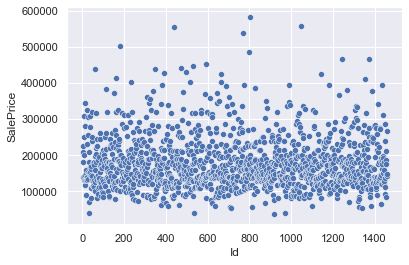

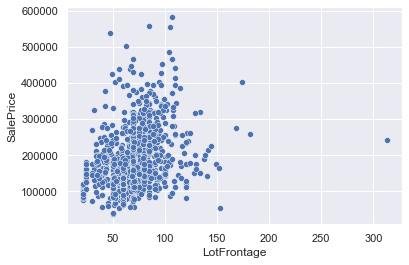

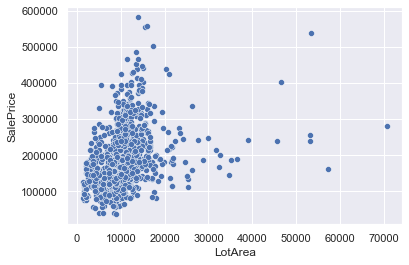

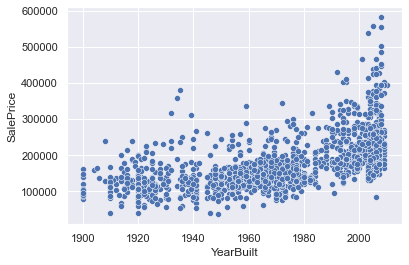

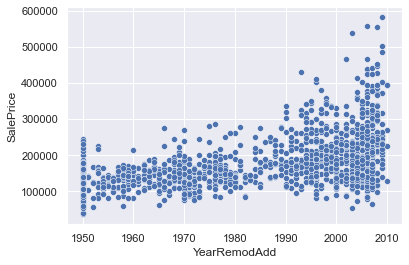

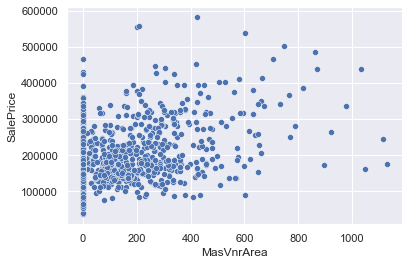

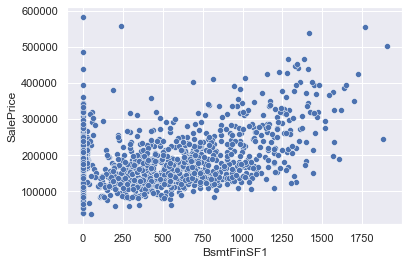

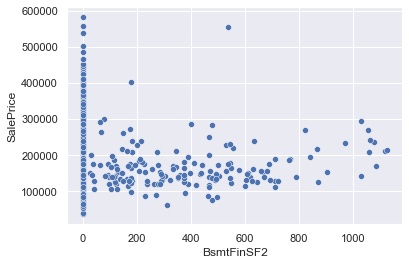

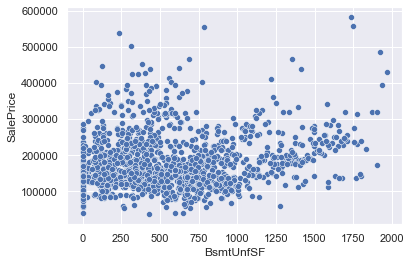

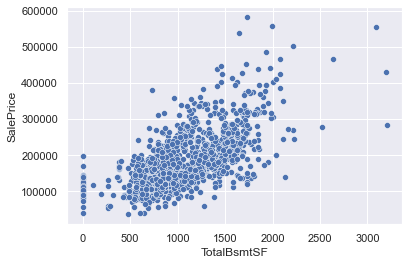

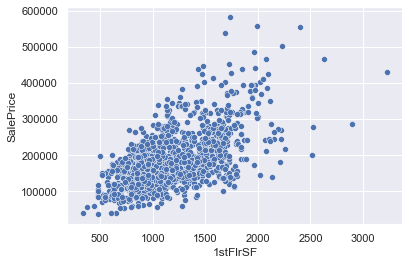

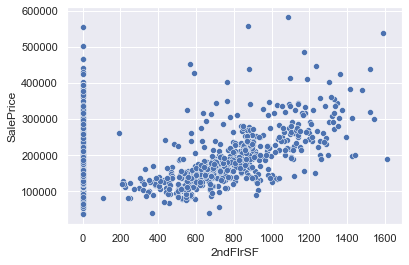

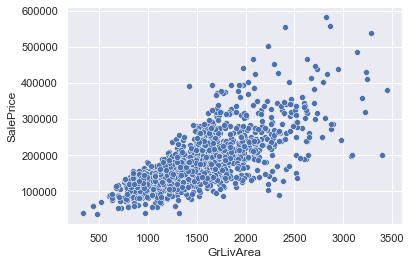

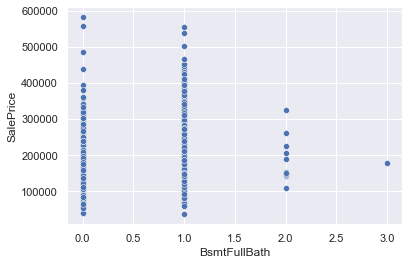

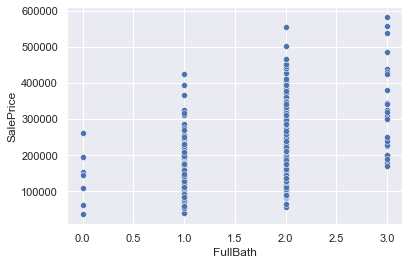

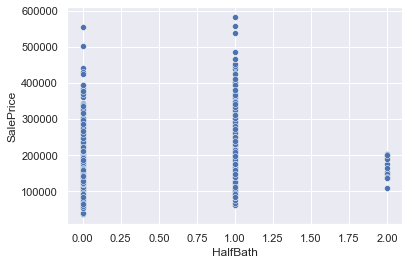

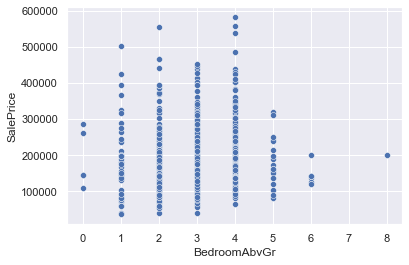

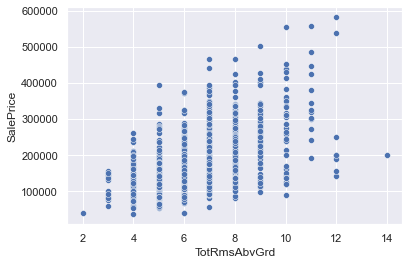

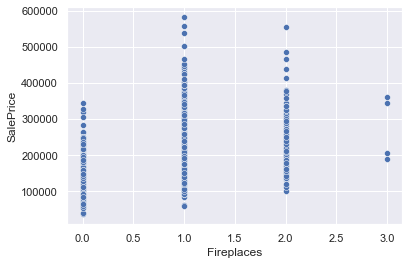

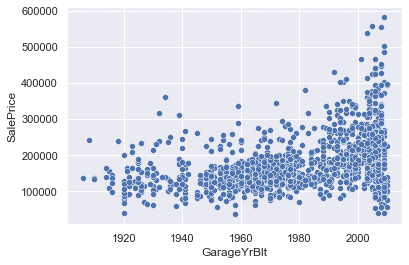

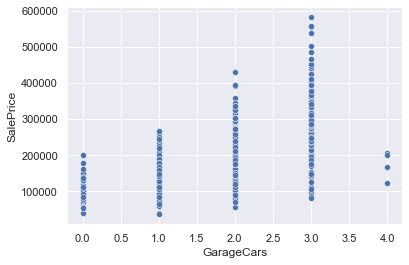

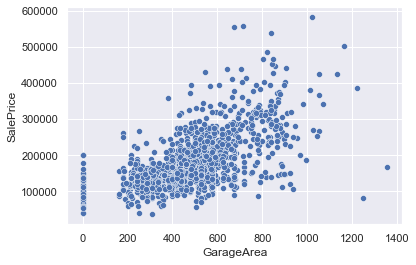

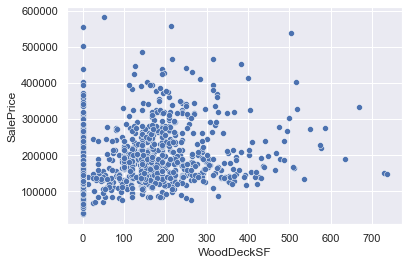

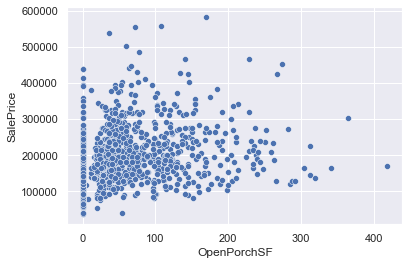

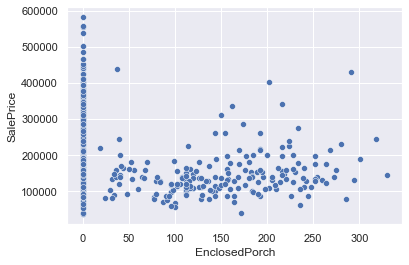

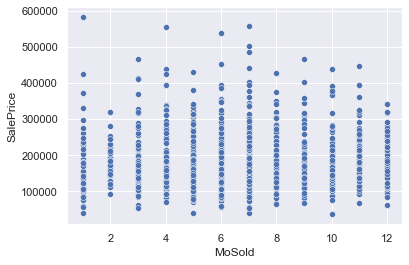

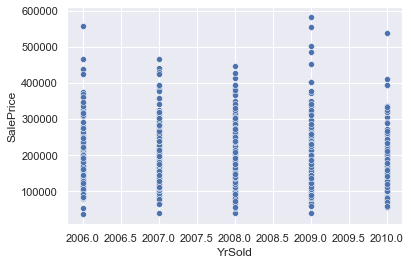

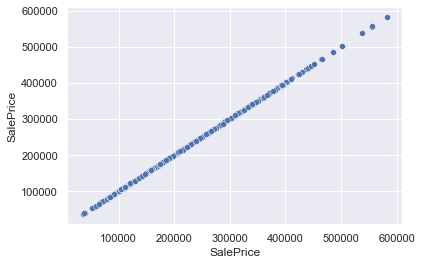

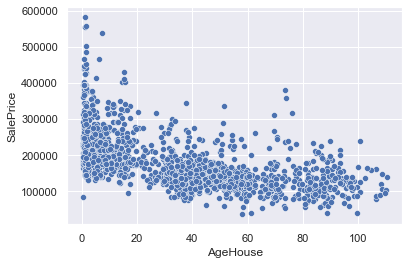

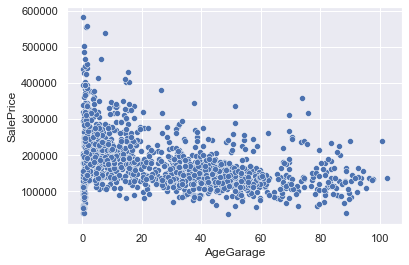

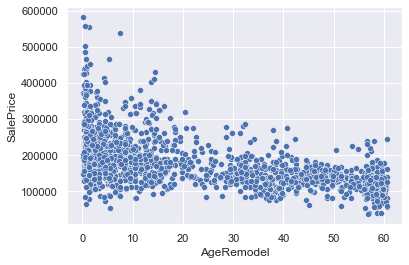

In [75]:
#  pairplot of only continous numerical variables

num_columns = houses.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns :
    plt.figure()
    sns.scatterplot(data=houses, y='SalePrice', x=col)
    plt.show()

**Observations:**

1. Target variable **'SalePrice'** is **highly postively** co-related with independent variables such as **'BsnmtFinSMF1', 'TotalBsmtSF', '1stFltSF', 'GrLivArea', 'TotalRmsGrd', '2ndFlrSF', 'Fullbath', 'TotalRmsAbvGrd', 'GarageArea'.**


2. Target variable **'SalePrice'** is **highly negatively** co-related with independent variables such as **'AgeRemodel', 'AgeGrage','AgeHouse' and 'AgeRemodel'.**


3. Target variable **'SalePrice'** is **moderately** co-related with independent variables such as **'LotFrontage', 'LotArea',
'MasVnrArea', 'BsMtHalfBath', 'HalfBath', 'FirePlaces', 'GarageCars', 'WoodDescSF', 'OpenPorchSF'**



### 7.2 Visualising categorial data

We will make a boxplot for these categorical variables.

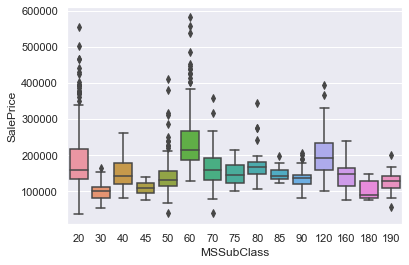

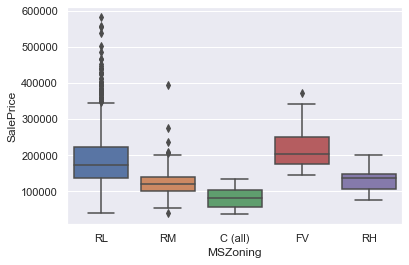

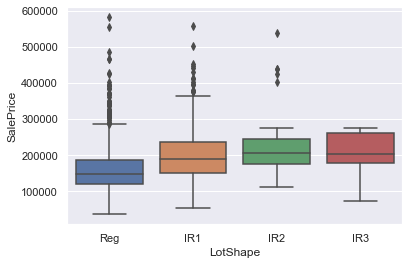

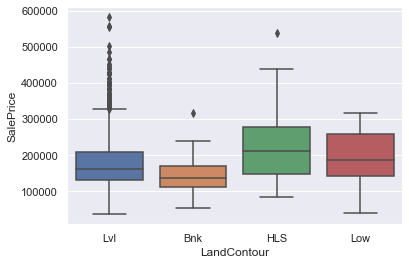

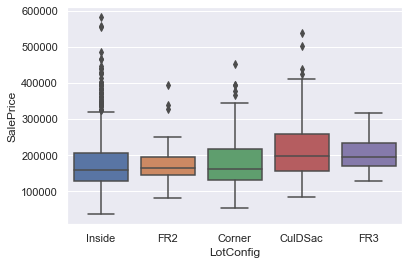

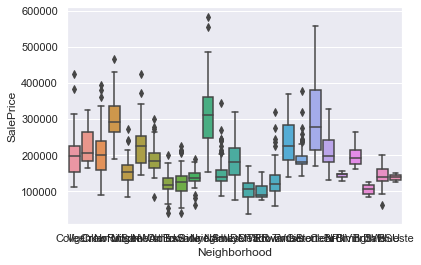

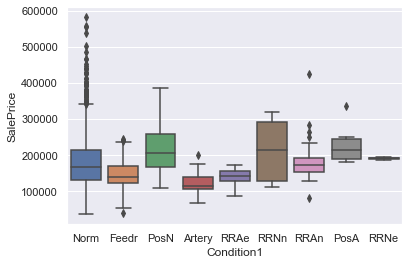

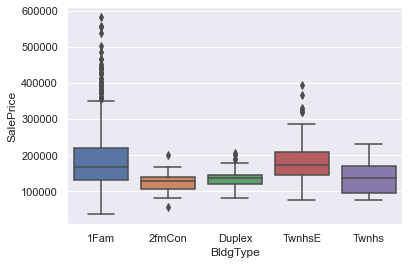

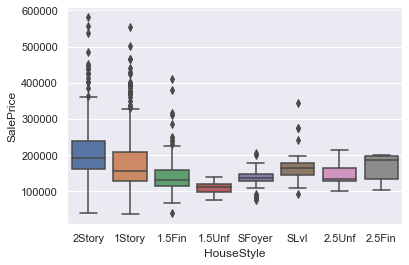

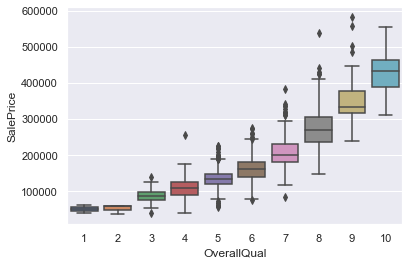

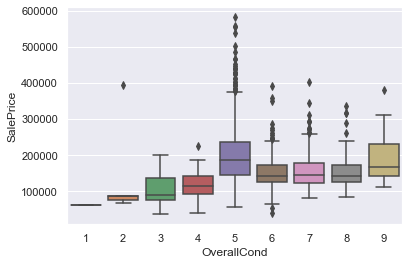

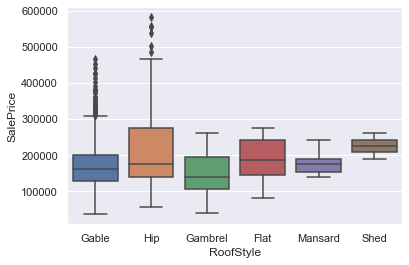

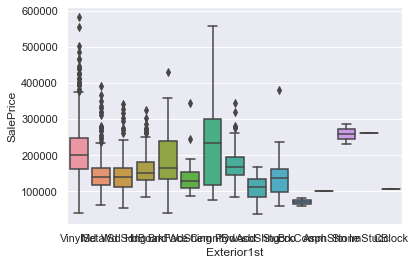

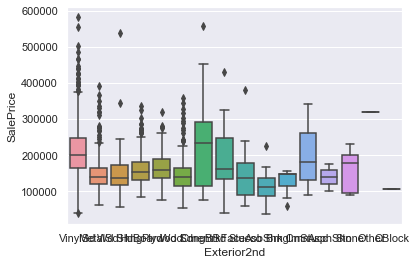

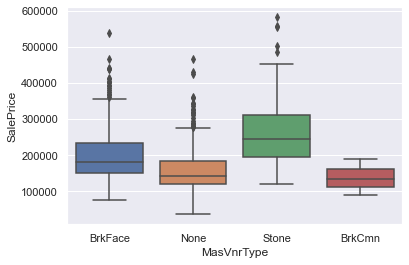

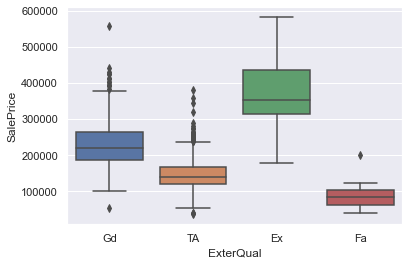

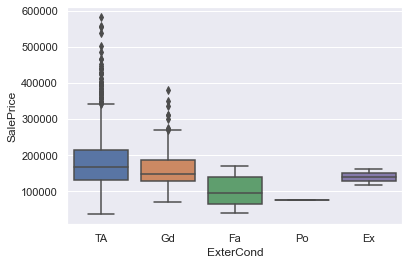

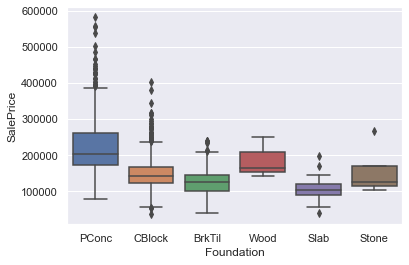

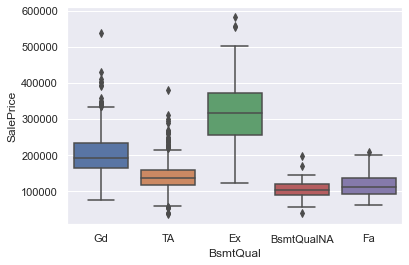

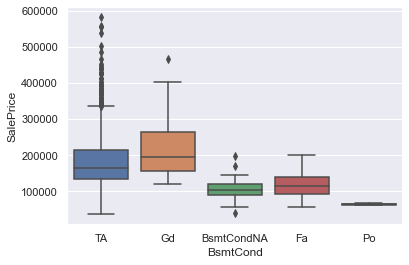

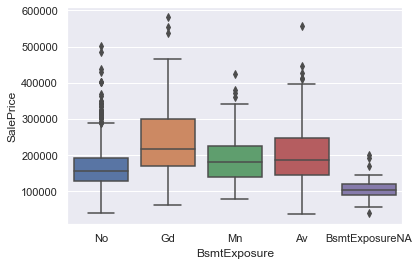

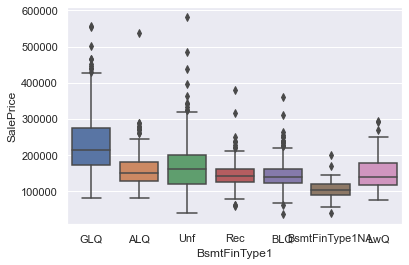

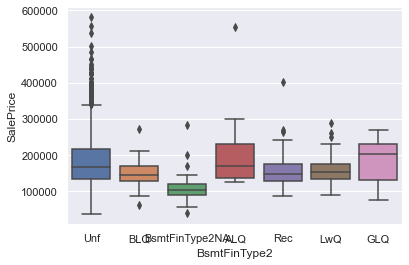

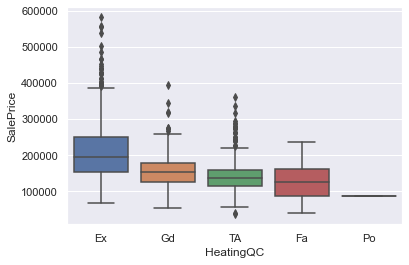

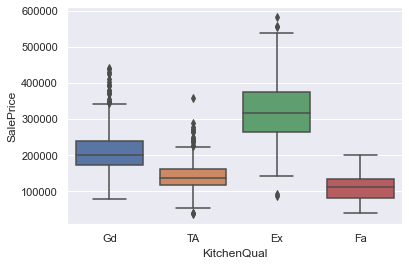

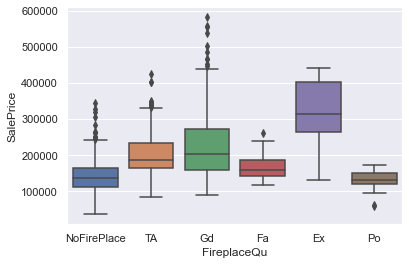

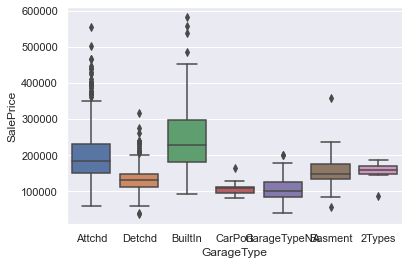

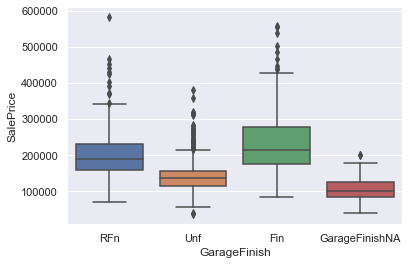

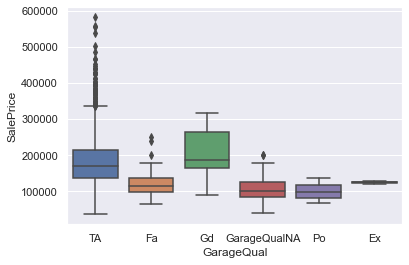

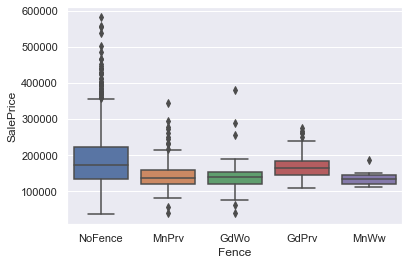

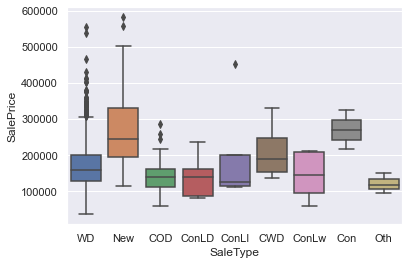

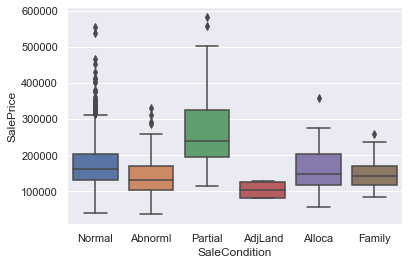

In [76]:
# boxplot of categorial variables

cat_columns = houses.select_dtypes(include=['object']).columns

for col in cat_columns :
    plt.figure()
    sns.boxplot(data=houses, y='SalePrice', x=col)
    plt.show()


**Observations:**

1. The house prices for certain zoning such 'FV' is high while it low for zoning such as 'RM' and and 'C'.

2. A 'Paved' house sells higher than 'Grave' one.

3. 'Alley' may have slight influence over the prices.

4. 'Subclass', 'Neighborhood', 'HouseStyle',  of the house affect the prices in a complex way.

5.  All except lot shape 'Reg' fetch higher prices.

6.  All except lot shape 'Lvl' fetch higher prices.

7.  'LotConfig', 'LanSlope' , 'BldgType', "RoofStyle', "RoofMat",'Exterior', 'Foundation', 'BsmtExposure', 'BsmtFinType', 'Functional', 'Fence', 'MiscFeatures' do not have significant influence over prices.

8. 'Condition' hase varied effect on the sale price.

9. 'OverallQual', 'OverAllCOnd' have very high influence on the sale price, 10 being highest.

10. 'Stone' type venner masonry has a positive influence over the prices.

11. Good 'External' Appearance and 'External COndition', 'Basement Quality', 'Heating', 'KitchenQua', 'FirePlace', 'PoolQC', also drive the price up very much if they are of good quality.

12. Having 'Central Airconditing' and 'Builtin Garage' and 'Garage FInish' also drive prices up.

13. A 'new' sale type higher prices than other sale types inclduing the 'Partial Sale'.


### 7.3 Find co-relation using heatmap

We will plot a heatmap to get co-relation between target and independent variables and among themselves.

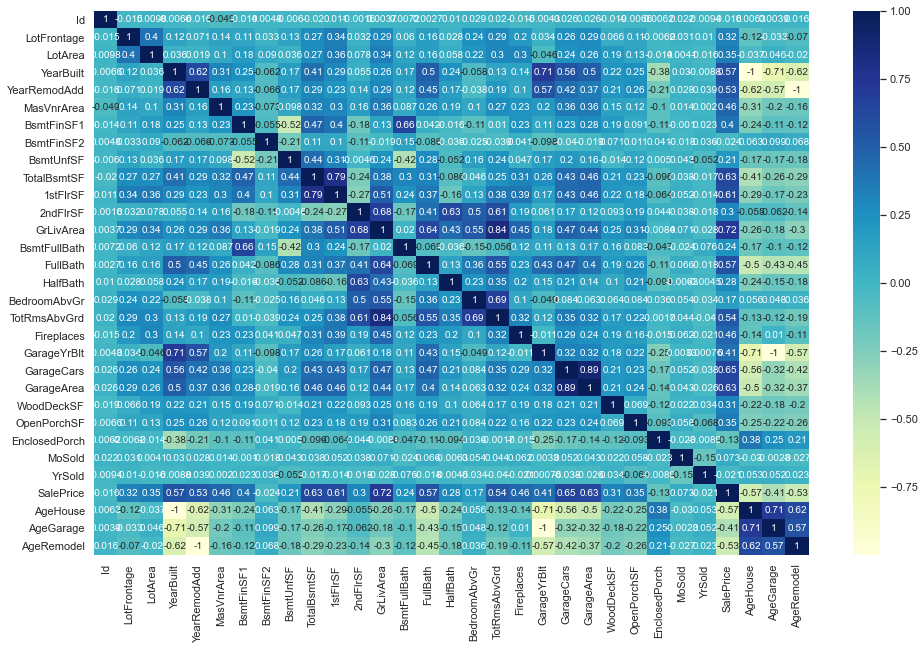

In [77]:
# Check the correlation coefficients to see which variables are highly correlated. 
# This will hint regarding multicollinearity as well as to on which independent variables the target variable depends.

plt.figure(figsize = (16, 10))
sns.heatmap(houses.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

1. Target variable 'SalePrice' is highly postively co-related with independent variables such as 'BsnmtFinSMF1', 'TotalBsmtSF',
'1stFltSF', 'GrLivArea', 'TotalRmsGrd', '2ndFlrSF', 'Fullbath', 'TotalRmsAbvGrd', 'GarageArea'.


2. Target variable 'SalePrice' is highly negatively co-related with independent variables such as 'AgeRemodel', 'AgeGrage',
'AgeHouse' and 'AgeRemodel'.

3. Target variable 'SalePrice' is moderately co-related with independent variables such as 'LotFrontage', 'LotArea',
'MasVnrArea', 'BsMtHalfBath', 'HalfBath', 'FirePlaces', 'GarageCars', 'WoodDescSF', 'OpenPorchSF'.

4. The house prices for certain zoning such 'FV' is high while it low for zoning such as 'RM' and and 'C'.

5. A 'Paved' house sells higher than 'Grave' one.

6. 'Alley' may have slight influence over the prices.

7. 'Subclass', 'Neighborhood', 'HouseStyle',  of the house affect the prices in a complex way.

8.  All except lot shape 'Reg' fetch higher prices.

9.  All except lot shape 'Lvl' fetch higher prices.

10.  'LotConfig', 'LanSlope' , 'BldgType', "RoofStyle', "RoofMat",'Exterior', 'Foundation', 'BsmtExposure', 'BsmtFinType', 'Functional', 'Fence', 'MiscFeatures' do not have significant influence over prices.

11. 'Condition' hase varied effect on the sale price.

12. 'OverallQual', 'OverAllCOnd' have very high influence on the sale price, 10 being highest.

13. 'Stone' type venner masonry has a positive influence over the prices.

14. Good 'External' Appearance and 'External COndition', 'Basement Quality', 'Heating', 'KitchenQua', 'FirePlace', 'PoolQC', also drive the price up very much if they are of good quality.

15. Having 'Central Airconditing' and 'Builtin Garage' and 'Garage FInish' also drive prices up.

16. A 'new' sale type higher prices than other sale types inclduing the 'Partial Sale'.

17. There might be interrelated variables which may show multi-colinearity such as 'TotalRmsAbvGrd' and 'GrvArea', 


### 7.4 Dropping unnecessary columns

1. Column 'Id' is a simple record index, hence it has no effect on analysis. So it will be dropped.


2. Columns 'YrSold', 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' are now fully qualified by columns with 'AgeHouse', 'AgeGarage' and 'AgeRemodel' so they will be dropped.

   
3. From corelation matrix we can see that 'AgeGarage', 'TotRmsAbvGrd', 'GarageArea' are **highly corelated** to other variables, so to **reduce effect of multicollienarity** we will drop them.
  

In [78]:
#  Drop columns in place

houses.drop(['AgeGarage', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

houses.drop(['Id','YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

## 8. Data Preparation 


#### Data Preparation

Ih this we will do dummy encoding and scaling of the variables

In [79]:
# split into X and y

# pop out target variable 'Saleprice' in to y
y = houses.pop('SalePrice')

# assign rest of columns in X
X = houses


In [80]:
# List of variables to encode

varlist =  X.select_dtypes(include=['object']).columns

# we will drop the first column of each of the above set as n-1 levels are enough to describe a variable, if it has n levels

X = pd.get_dummies(data=X, columns=varlist, drop_first = True)

# rename columns for easy identification

X.rename(columns = {'OverallQual_1':'OverallQual_VeryPoor', 'OverallQual_2':'OverallQual_Poor','OverallQual_3':'OverallQual_Fair', \
                       'OverallQual_4':'OverallQual_BelowAverage','OverallQual_5':'OverallQual_Average', 'OverallQual_6':'OverallQual_AboveAverage', \
                       'OverallQual_7':'OverallQual_Good', 'OverallQual_8':'OverallQual_VeryGood', \
                       'OverallQual_9':'OverallQual_Excellent', 'OverallQual_2':'OverallQual_VeryExcellent'}, inplace = True)


# check the dataset after dummy creation

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,AgeHouse,AgeRemodel,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_VeryExcellent,OverallQual_Fair,OverallQual_BelowAverage,OverallQual_Average,OverallQual_AboveAverage,OverallQual_Good,OverallQual_VeryGood,OverallQual_Excellent,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposureNA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1NA,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2NA,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageTypeNA,GarageFinish_GarageFinishNA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQualNA,GarageQual_Gd,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,2,5.17,5.17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

## 9. Rescaling the Features 

We will all bring them to same scale using **Scaling**, as it

1. Helps in faster convergence to minima during training.


2. It makes evaluation of the model easier.


3. It is necessary before using Ridge or Lasso


In [81]:
# scaling the features 
from sklearn.preprocessing import scale

# storing column names in cols, 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)

## 10. Creation of Training and Test Sets 

We will split the data in to training and test set, with training set being 70% of whole data and rest 30% being test set.

In [82]:
# Set the random number generator seed and random_state so that we alawys get the same set of data

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 11. Building a Linear Regression model

**Our approach**

1. First a build Linear Regressin model with all features.


2. Check the model for overfitting.


3. To reduce overfitting we will use **regularisation** methods such as **Lasso and Ridge**

### 11.1 Build a linear Regression model without regularisation

In [83]:
# Create a LinearRegression object

lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
# Print some statistics such as intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

15195869803949.863
[ 8.97034792e+02  6.05979768e+03  1.36503472e+03 -6.74185551e+15
 -2.49599458e+15 -6.84732136e+15  6.42491298e+15  1.29918642e+04
  2.08960882e+04  1.73873438e+03  8.17078125e+02  7.09312500e+02
  1.39275000e+03 -1.81368750e+03  1.79975000e+03  4.95581250e+03
  1.16875000e+03  1.39371875e+03  1.47750000e+03 -6.49125000e+02
 -1.19571250e+04 -2.20950000e+03  5.08375000e+02  9.15312500e+02
  6.39218750e+01  1.88671875e+01  4.44750000e+02  1.43814062e+03
  1.03125000e+03 -9.87750000e+02 -1.43212500e+03 -1.17354788e+15
 -2.96187500e+03 -1.92075000e+03 -5.56750000e+02  5.55125000e+02
  5.80000000e+03  2.07850000e+03  8.58662500e+03  5.95637500e+03
  1.20750000e+03 -5.93125000e+01  7.15750000e+02 -7.10937500e+01
 -8.89875000e+02 -1.84500000e+02  1.43950000e+03 -1.41562500e+03
 -8.88750000e+01 -1.68500000e+02  1.35140625e+02 -2.56000000e+02
 -3.02787500e+03 -2.41950000e+03 -6.25437500e+03 -1.00312500e+02
 -7.43900000e+03 -4.45800000e+03 -3.52975000e+03 -1.79912500e+03
 -5.23

In [85]:
# now get additional metrics on training and test dataset


y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 (test) :', r2_test_lr)
metric.append(r2_test_lr)

res_train = y_train - y_pred_train
rss1_lr = np.sum(np.square(res_train))
print('RSS (train):', rss1_lr)
metric.append(rss1_lr)

res_test = y_test - y_pred_test
rss2_lr = np.sum(np.square(res_test))
print('RSS (test):', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (test):', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 (train): 0.9494550720490621
R2 (test) : -1.8835321544272108e+20
RSS (train): 260389834659.38977
RSS (test): 4.645602953014653e+32
MSE (train): 261435576.9672588
MSE (test): 1.087963220846523e+30


**Obervations**

Since the train R2 score is 0.95, while it is very poor -1.89 n test set, **it shows that model has overfitted.**

Hence we will **need regularisation**.

## 12. Use Ridge Regression to regularise



### 12.1 Use RFE to reduce number of features

We will use *RFE* to reduce the number of features to 12.

**We have selected the number 12 as this is a optimum number to explain to the business without sacrificing on accuracy.**

**Also we can not select all features for Ridge as it will not eliminate them.**

In [86]:
# create object which will be used for RFE later on

lmrfe = LinearRegression()

In [87]:
# instruct RFE to find 12 significant variables

rfe = RFE(lmrfe, 12)
rfe = rfe.fit(X_train, y_train)

In [88]:
# list out the variables in ranking order

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 124),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 114),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 20),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 139),
 ('BsmtFullBath', False, 162),
 ('FullBath', False, 163),
 ('HalfBath', False, 142),
 ('BedroomAbvGr', False, 39),
 ('Fireplaces', False, 86),
 ('GarageCars', False, 11),
 ('WoodDeckSF', False, 102),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 98),
 ('MoSold', False, 152),
 ('AgeHouse', True, 1),
 ('AgeRemodel', False, 55),
 ('MSSubClass_30', False, 181),
 ('MSSubClass_40', False, 137),
 ('MSSubClass_45', False, 213),
 ('MSSubClass_50', False, 214),
 ('MSSubClass_60', False, 169),
 ('MSSubClass_70', False, 150),
 ('MSSubClass_75', False, 170),
 ('MSSubClass_80', False, 133),
 ('MSSubClass_85', False, 119),
 ('MSSubClass_90', False, 13),
 ('MSSubClass_120', False, 40),
 ('MSSubClass_160', False, 46),
 ('MSSubClass_

In [89]:
# columns which will be used for fitting

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'AgeHouse', 'OverallQual_Good', 'OverallQual_VeryGood',
       'OverallQual_Excellent', 'OverallQual_10', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd'],
      dtype='object')

In [90]:
# columns which RFE deemed un-important

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

In [91]:
# get our final training dataset

X_train_rfe = X_train[col]

### 12.2 Use GridSearchCV cross-valiation to find optimum value of alpha

In [92]:
# list of alphas to tune - 
# first we will tune aplha following approximately logarithimc scale
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000 ]}

ridge = Ridge()

# we will use 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Print the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 70}


**We got a approximate value of alpha as 70.**

We will **fine tune** further by taking a range of alpha from 60 to 80, with 50 points inbetween

In [94]:
# list of alphas to tune using linspace
params = {'alpha': np.linspace(60, 80, 50)}

ridge = Ridge()

# we will use 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([60.        , 60.40816327, 60.81632653, 61.2244898 , 61.63265306,
       62.04081633, 62.44897959, 62.85714286, 63.26530612, 63.67346939,
       64.08163265, 64.48979592, 64.89795918, 65.30612245, 65.71428571,
       66.12244898, 66.53061224, 66.93877551, 67.34693878, 67.75510204,
       68.16326531, 68.57142857, 68.97959184, 69.3877551 , 69.79591837,
       70.20408163, 70.6122449 , 71.02040816, 71.42857143, 71.83673469,
       72.24489796, 72.65306122, 73.06122449, 73.46938776, 73.87755102,
       74.28571429, 74.69387755, 75.10204082, 75.51020408, 75.91836735,
       76.32653061, 76.73469388, 77.14285714, 77.55102041, 77.95918367,
       78.36734694, 78.7755102 , 79.18367347, 79.59183673, 80.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Print the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 73.87755102040816}


**Note**

We have been able to further finetune value of alpha as **73.87755102040816**

In [96]:
# fit on the best alpha
alpha = 73.87755102040816

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train_rfe, y_train)
print(ridge.intercept_)
print(ridge.coef_) 


177574.75062842766
[  8465.27452378  10055.41578126  11282.10544603  16236.42362822
  22601.8593838  -13339.15439469   9718.88592047  18241.76554596
  18289.10317734  12655.54948506   2886.98980026  -1923.05230974]


### 12.2 Making predictions on test set and find metrics

In [97]:
# get test dataset based on rfe columns
X_test_rfe = X_test[col]

# calculate metrics such as R2 score, RSS and RMSE
# we will append to an array so that we can print the summary later on

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

met_ridge = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_ridge.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_ridge.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_ridge.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_ridge.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_ridge.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_ridge.append(mse_test ** 0.5)

R2 (train): 0.875283343796492
R2 (test): 0.8435816612901446
RSS (train): 642496701540.9661
R2 (test): 385795110801.8807
MSE (train): 645077009.5792832
MSE (test): 903501430.4493693


**Obervation:**

Since the train R2 score is **0.87**, while it comparable on test with a score of **0.84** on test set, **it shows that model has generalised well and issue of overfitting has been reduced.**

**And Ridge has been effective in regularisation**

### 12.3 Residual Analysis of the training data

We will now validate the assumptions of linear regression

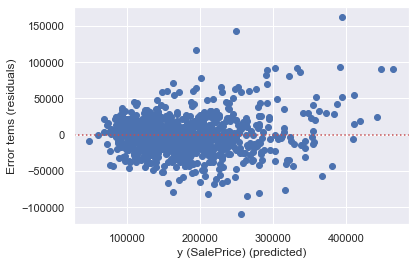

In [98]:
# creat a scatter plot between residuals and target

res_train = y_train - y_pred_train
plt.scatter(y_pred_train, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (SalePrice) (predicted)')
plt.show()

**Observations**

1. Above plot shows that error terms do not show any constant pattern (increase or decrease).


2. Error terms areand are fairly randomly distributed and thus independent of each other.


3. Error terms have constant variance (homoscedasticity)

<Figure size 432x432 with 0 Axes>

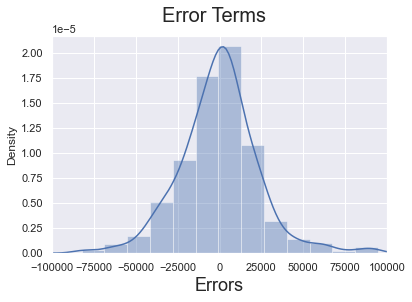

In [99]:
# plot a histogram of residuals

plt.figure(figsize=(6,6))
fig = plt.figure()
ax = plt.gca()
ax.set_xlim(xmin=-100000, xmax=100000)
sns.distplot(res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()


**Observation**

Above histogram shows a normal distribution of error terms, hence proving the this assumption of linear regression.

### 12.4  Evaluation  using plot of prediction versus predicted sale price (using Ridge)

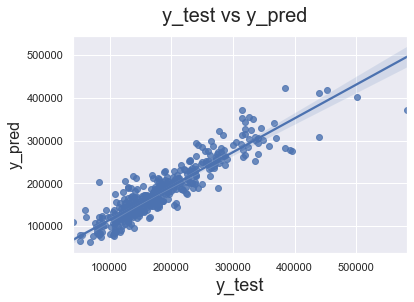

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [101]:
# print coefficeints

ridge_betas = pd.DataFrame(index=col)
ridge_betas['Ridge'] = np.round(ridge.coef_,2)
ridge_betas

,Ridge
LotArea,8465.27
BsmtFinSF1,10055.42
TotalBsmtSF,11282.11
1stFlrSF,16236.42
2ndFlrSF,22601.86
AgeHouse,-13339.15
OverallQual_Good,9718.89
OverallQual_VeryGood,18241.77
OverallQual_Excellent,18289.10
OverallQual_10,12655.55


#### Conclusion : Our R-square on test is 0.84 while it was 0.87 on the training dataset. 
#### Since they are quite close it shows that model has generalised well on the test dataset and there is no over or under fitting.

We can see that the equation of our best fitted line is:

$ count = 177574.75 \times constant + 8465.27  \times LotArea + 10055.42  \times  BsmtFinSF1 + 11282.11 \times TotalBsmtSF + 16236.42 \times 1stFlrSF + 22601.86 \times 2ndFlrSF - 13339.15 \times AgeHouse + 9718.89 \times OverallQual_Good + 18241.77 \times OverallQual_VeryGood + 18289.10 \times OverallQual_Excellent + 12655.55 \times OverallQual_10 + 2886.99 \times Exterior1st_CemntB - 1923.05 \times Exterior2nd_CmentBd	$


#### Since actual versus predicted value fit the line, we have a decent model.

### 12.5 Variables that are significant in predicting the price of the house.

Following variables are significant

**Lot Area**

**Base Finish (Type 1)**

**Total Basement Area** 

**First Floor Area**

**2nd Floor Area**

**Age of house**

**Overall Condition of House** (in particular if it is Excellent, Very good and Good)

**Overall Quality** (in particular if it is Excellent)

**Exterior Covering on house** (if it is Cement)


### 12.6 How variables describe the demand (Dynamics of the price) - Ridge Regression

Based up on above variables and their coefficients, we can group drivers variables in following groups

**Positive Drivers**

These variables increase the price of the house. So company should check and buy properties having these characterstics

Lot Area

Base Finish (Type 1)

Total Basement Area

First Floor Area

2nd Floor Area

Overall Condition of House (in particular if it is Excellent, Very good and Good)

Exterior Covering on house (if it is Cement and covering is of one type only)


**Negative Drivers**


Age of house


Exterior Covering on house (if it is Cement and covering is more than one type)


## 13. Use Lasso Regression to regularise

### 13.1 Use RFE to reduce number of features

We will use *RFE* to reduce the number of features to 12.

**We have selected the number 12 , as we hope that Lasso will do further featyre selection and reduce it further and making the model simpler.**



In [102]:
# create object which will be used for RFE later on

lmrfe = LinearRegression()

In [103]:
# instruct RFE to find 12 significant variables

rfe = RFE(lmrfe, 12)
rfe = rfe.fit(X_train, y_train)

In [104]:
# list out the variables in ranking order

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 124),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 114),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 20),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 139),
 ('BsmtFullBath', False, 162),
 ('FullBath', False, 163),
 ('HalfBath', False, 142),
 ('BedroomAbvGr', False, 39),
 ('Fireplaces', False, 86),
 ('GarageCars', False, 11),
 ('WoodDeckSF', False, 102),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 98),
 ('MoSold', False, 152),
 ('AgeHouse', True, 1),
 ('AgeRemodel', False, 55),
 ('MSSubClass_30', False, 181),
 ('MSSubClass_40', False, 137),
 ('MSSubClass_45', False, 213),
 ('MSSubClass_50', False, 214),
 ('MSSubClass_60', False, 169),
 ('MSSubClass_70', False, 150),
 ('MSSubClass_75', False, 170),
 ('MSSubClass_80', False, 133),
 ('MSSubClass_85', False, 119),
 ('MSSubClass_90', False, 13),
 ('MSSubClass_120', False, 40),
 ('MSSubClass_160', False, 46),
 ('MSSubClass_

In [105]:
# columns which will be used for fitting

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'AgeHouse', 'OverallQual_Good', 'OverallQual_VeryGood',
       'OverallQual_Excellent', 'OverallQual_10', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd'],
      dtype='object')

In [106]:
# columns which RFE deemed un-important

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

In [107]:
# get our final training dataset

X_train_rfe = X_train[col]

### 13.2 Use GridSearchCV cross-valiation to find optimum value of alpha

In [108]:
# list of alphas to tune - 
# first we will tune aplha following approximately logarithimc scale
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [110]:
#Fitting Lasso model for alpha = 1000 and printing coefficients

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)
print(lasso.intercept_)
print(lasso.coef_)

177574.4053922789
[  7806.06683465   9953.10858587  10440.66261847  17625.86877885
  23604.02751164 -13366.2720206    9263.32250645  18436.39755318
  18586.73705315  12650.28534561    107.79560197      0.        ]


### 13.2 Making predictions on test set and find metrics

In [111]:
# get test dataset based on rfe columns
X_test_rfe = X_test[col]

# calculate metrics such as R2 score, RSS and RMSE
# we will append to an array so that we can print the summary later on

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

met_lasso = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_lasso.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_lasso.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_lasso.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_lasso.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_lasso.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_lasso.append(mse_test ** 0.5)

R2 (train): 0.8754164335474539
R2 (test): 0.8465038635922109
RSS (train): 641811069576.4401
R2 (test): 378587699124.90076
MSE (train): 644388624.072731
MSE (test): 886622246.194147


**Obervation:**

Since the train R2 score is **0.87**, while it comparable on test with a score of **0.84** on test set, **it shows that model has generalised well and issue of overfitting has been reduced.**

Lasso has also made one of the coefficient as zero.

**And Lasso has been effective in regularisation**

### 13.3 Residual Analysis of the training data

We will now validate the assumptions of linear regression

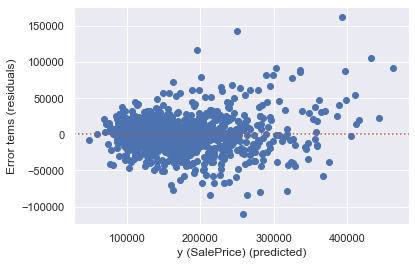

In [112]:
# creat a scatter plot between residuals and target

res_train = y_train - y_pred_train
plt.scatter(y_pred_train, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (SalePrice) (predicted)')
plt.show()

**Observations**

1. Above plot shows that error terms do not show any constant pattern (increase or decrease).


2. Error terms areand are fairly randomly distributed and thus independent of each other.


3. Error terms have constant variance (homoscedasticity)

<Figure size 432x432 with 0 Axes>

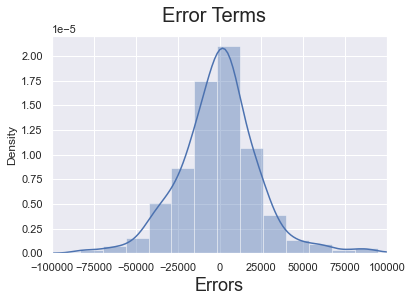

In [113]:
# plot a histogram of residuals

plt.figure(figsize=(6,6))
fig = plt.figure()
ax = plt.gca()
ax.set_xlim(xmin=-100000, xmax=100000)
sns.distplot(res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()


**Observation**

Above histogram shows a normal distribution of error terms, hence proving the this assumption of linear regression.

### 13.4  Evaluation  using plot of prediction versus predicted sale price (using Lasso)

Text(0, 0.5, 'y_pred')

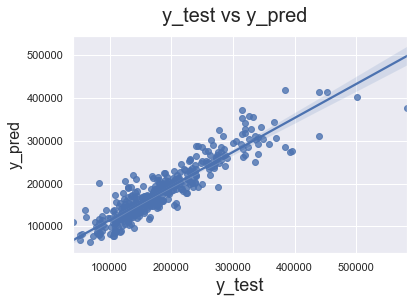

In [114]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [115]:
# print coefficeints

lasso_betas = pd.DataFrame(index=col)
lasso_betas['Lasso'] = np.round(lasso.coef_,2)
lasso_betas

,Lasso
LotArea,7806.07
BsmtFinSF1,9953.11
TotalBsmtSF,10440.66
1stFlrSF,17625.87
2ndFlrSF,23604.03
AgeHouse,-13366.27
OverallQual_Good,9263.32
OverallQual_VeryGood,18436.40
OverallQual_Excellent,18586.74
OverallQual_10,12650.29


#### Conclusion : Our R-square on test is 0.84 while it was 0.87 on the training dataset. 
#### Since they are quite close it shows that model has generalised well on the test dataset and there is no over or under fitting.

We can see that the equation of our best fitted line is:

$ count = 177574.40 \times constant + 7806.07 \times LotArea + 9953.11  \times  BsmtFinSF1 + 10440.66 \times TotalBsmtSF + 17625.87 \times 1stFlrSF + 23604.03 \times 2ndFlrSF - 13366.27 \times AgeHouse + 9263.32 \times OverallQual_Good + 18436.40 \times OverallQual_VeryGood - 18586.74 \times OverallQual_Excellent + 12650.29 \times OverallQual_10 + 107.80 \times Exterior1st_CemntB 	$

**Note: Lasso has excluded feature Exterior2nd_CmentBd**

#### Since actual versus predicted value fit the line, we have a decent model.

### 13.5 Variables that are significant in predicting the price of house.

Following variables are significant

**Lot Area**

**Base Finish (Type 1)**

**Total Basement Area** 

**First Floor Area**

**2nd Floor Area**

**Age of house**

**Overall Condition of House** (in particular if it is Excellent, Very good and Good)

**Overall Quality** (in particular if it is Excellent)

**Exterior Covering on house** (if it is Cement)


### 13.6 How variables describe the demand (Dynamics of the price) - Lasso Regression

Based up on above variables and their coefficients, we can group drivers variables in following groups

**Positive Drivers**

These variables increase the price of the house. So company should check and buy properties having these characterstics

Lot Area

Base Finish (Type 1)

Total Basement Area

First Floor Area

2nd Floor Area

Overall Condition of House (in particular if it is Excellent, Very good and Good)

Exterior Covering on house (if it is Cement and covering is of one type only)


**Negative Drivers**


Age of house


##  14. Excercise Question 1:

Doubling the value of alpha for Ridge and Lasso

In [116]:
# fit on the dopuble the best alpha

alpha = 2 * 73.87755102040816

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train_rfe, y_train)

# get test dataset based on rfe columns
X_test_rfe = X_test[col]

# calculate metrics such as R2 score, RSS and RMSE
# we will append to an array so that we can print the summary later on

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

met_redige_dbl = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_redige_dbl.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_redige_dbl.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_redige_dbl.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_redige_dbl.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_redige_dbl.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_redige_dbl.append(mse_test ** 0.5)

# print coefficeints

ridge_betas['Alpha = 146'] = np.round(ridge.coef_,2)
ridge_betas.rename(columns={'Ridge':'Alpha = 73' }, inplace=True)
ridge_betas

R2 (train): 0.8708843529275342
R2 (test): 0.8367558171020024
RSS (train): 665158767775.3457
R2 (test): 402630587617.45654
MSE (train): 667830088.1278571
MSE (test): 942928776.6216781


,Alpha = 73,Alpha = 146
LotArea,8465.27,8517.30
BsmtFinSF1,10055.42,9597.65
TotalBsmtSF,11282.11,11752.58
1stFlrSF,16236.42,15317.33
2ndFlrSF,22601.86,21160.72
AgeHouse,-13339.15,-13466.02
OverallQual_Good,9718.89,8957.19
OverallQual_VeryGood,18241.77,17127.70
OverallQual_Excellent,18289.10,17141.16
OverallQual_10,12655.55,11824.67


In [117]:
# build a table of metrics such R2

metrics = pd.DataFrame({'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Alpha = 73': np.round(met_ridge,2), 'Alpha = 146' : np.round(met_redige_dbl,2)})

In [118]:
metrics

,Metric,Alpha = 73,Alpha = 146
0,R2 Score (Train),8.800000e-01,8.700000e-01
1,R2 Score (Test),8.400000e-01,8.400000e-01
2,RSS (Train),6.424967e+11,6.651588e+11
3,RSS (Test),3.857951e+11,4.026306e+11
4,MSE (Train),2.539837e+04,2.584241e+04
5,MSE (Test),3.005830e+04,3.070715e+04


In [119]:
# fit lasso on the double the best alpha

alpha = 2000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

# get test dataset based on rfe columns
X_test_rfe = X_test[col]

# calculate metrics such as R2 score, RSS and RMSE
# we will append to an array so that we can print the summary later on

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

met_lasso_dbl = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_lasso_dbl.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_lasso_dbl.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_lasso_dbl.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_lasso_dbl.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_lasso_dbl.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_lasso_dbl.append(mse_test ** 0.5)

# print coefficeints

lasso_betas['Alpha = 2000'] = np.round(lasso.coef_,2)
lasso_betas.rename(columns={'Lasso':'Alpha = 1000' }, inplace=True)
lasso_betas

R2 (train): 0.8708843529275342
R2 (test): 0.8367558171020024
RSS (train): 665158767775.3457
R2 (test): 402630587617.45654
MSE (train): 667830088.1278571
MSE (test): 942928776.6216781


,Alpha = 1000,Alpha = 2000
LotArea,7806.07,7195.76
BsmtFinSF1,9953.11,9152.02
TotalBsmtSF,10440.66,10728.07
1stFlrSF,17625.87,17596.41
2ndFlrSF,23604.03,22970.29
AgeHouse,-13366.27,-13714.59
OverallQual_Good,9263.32,7789.20
OverallQual_VeryGood,18436.40,17138.52
OverallQual_Excellent,18586.74,17454.56
OverallQual_10,12650.29,11605.36


In [120]:
# build a table of metrics such R2

metrics = pd.DataFrame({'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Alpha = 1000': np.round(met_lasso,2), 'Alpha = 2000' : np.round(met_lasso_dbl,2)})

In [121]:
metrics

,Metric,Alpha = 1000,Alpha = 2000
0,R2 Score (Train),8.800000e-01,8.700000e-01
1,R2 Score (Test),8.500000e-01,8.400000e-01
2,RSS (Train),6.418111e+11,6.651588e+11
3,RSS (Test),3.785877e+11,4.026306e+11
4,MSE (Train),2.538481e+04,2.584241e+04
5,MSE (Test),2.977620e+04,3.070715e+04


##  14. Excercise Question 3:

Dropping 5 important features of lasso and then building model again

In [122]:
# get 5 top features of lasso by sorting on absolute value of coefficient

# add a aboslute value column
lasso_betas['abs'] = lasso_betas['Alpha = 1000'].abs()


In [123]:
# sort the value by absolute value of the coefficient values (in this case 'Alpha' = 1000)

sorted_lasso = lasso_betas.sort_values(by='abs', ascending=False).head(5)
sorted_lasso

,Alpha = 1000,Alpha = 2000,abs
2ndFlrSF,23604.03,22970.29,23604.03
OverallQual_Excellent,18586.74,17454.56,18586.74
OverallQual_VeryGood,18436.40,17138.52,18436.40
1stFlrSF,17625.87,17596.41,17625.87
AgeHouse,-13366.27,-13714.59,13366.27


In [124]:
# we will drop the top five features

X_train_rfe = X_train_rfe.drop(sorted_lasso.index, axis=1)

In [125]:
# list of alphas to tune - 
# first we will tune aplha following approximately logarithimc scale

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train_rfe, y_train) 

print(model_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 500}


In [126]:
#Fitting Lasso model for alpha = 500 and printing coefficients

alpha = 500

lasso = Lasso(alpha=alpha)

# fit the model with alpha 500

lasso.fit(X_train_rfe, y_train)

lasso_betas = pd.DataFrame(index=X_train_rfe.columns)

# we will get top 5 features
lasso_betas['Lasso'] = np.round(lasso.coef_,2)
lasso_betas.sort_values(by='Lasso', ascending=False)

,Lasso
TotalBsmtSF,34037.08
LotArea,13668.31
OverallQual_Good,12117.09
OverallQual_10,10757.28
BsmtFinSF1,10015.99
Exterior1st_CemntBd,6249.84
Exterior2nd_CmentBd,0.00
